# Deep Learning -  Neural Net challenge

## Predict wine-class using a Keras deep learning model

### Load the libraries

In [19]:
# load libraries
import matplotlib.pyplot as plt    
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

from tensorflow import keras 
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.regularizers import l2

from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD

from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasRegressor

### Load data

In [8]:
df = pd.read_csv("wine.csv", index_col = "index")


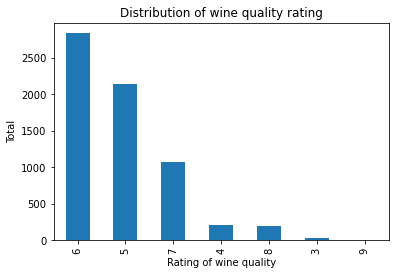

In [9]:
# Distribution of output or target variable
df['quality'].value_counts().plot.bar()
plt.title('Distribution of wine quality')
plt.xlabel('Rating of wine quality')
plt.ylabel('Total')

plt.show()

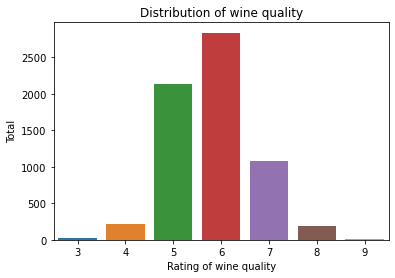

In [72]:
pt = sns.countplot(x='quality', data = df)
plt.xlabel('Rating of wine quality')
plt.ylabel('Total')
plt.title('Distribution of wine quality')

plt.show(pt)

The rating of wine quality distribute mostly at 5,6,7. It is possible to transform it into binary values (i.e. 0, 1)

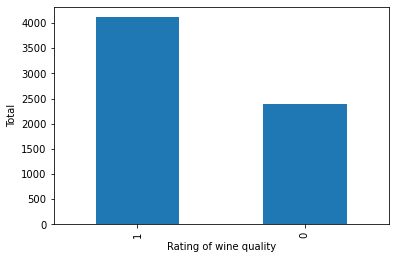

1    4113
0    2384
Name: quality, dtype: int64


In [10]:
# Transform target to binary values and check its distribution
df2 =df.copy()
df2['quality'] = df2['quality'].apply(lambda x: 0 if x < 6 else 1)
df2['quality'].value_counts().plot.bar()
#plt.xticks( ('Good', 'Bad') )
plt.xlabel('Rating of wine quality')
plt.ylabel('Total')

plt.show()
# with this transformation the new values 0 represent for values from [3-5] and 1: [6-9]
print(df2['quality'].value_counts())

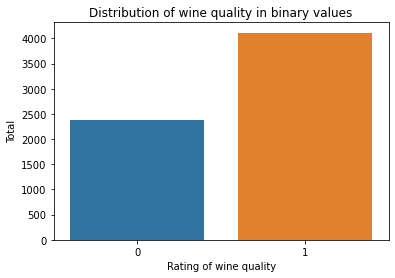

1    4113
0    2384
Name: quality, dtype: int64


In [167]:
pt = sns.countplot(x='quality', data = df2)
plt.xlabel('Rating of wine quality')
plt.ylabel('Total')
plt.title('Distribution of wine quality in binary values')

plt.show(pt)
print(df2['quality'].value_counts())

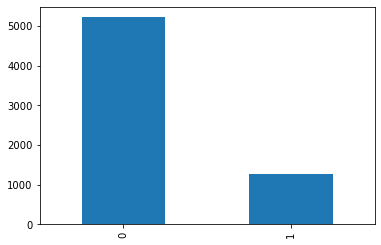

0    5220
1    1277
Name: quality, dtype: int64


In [11]:
# Transform target to binary values and check its distribution
df3 =df.copy()
df3['quality'] = df3['quality'].apply(lambda x: 0 if x < 7 else 1)
df3['quality'].value_counts().plot.bar()
plt.show()
# with this transformation the new values 0 represent for values from [3-6] and 1: [7-9]
print(df3['quality'].value_counts())

#So we choose the good wine quality (1) with a range from 6-9 in the previous scale that making more sense 

/Users/minhhienvo/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/minhhienvo/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/minhhienvo/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

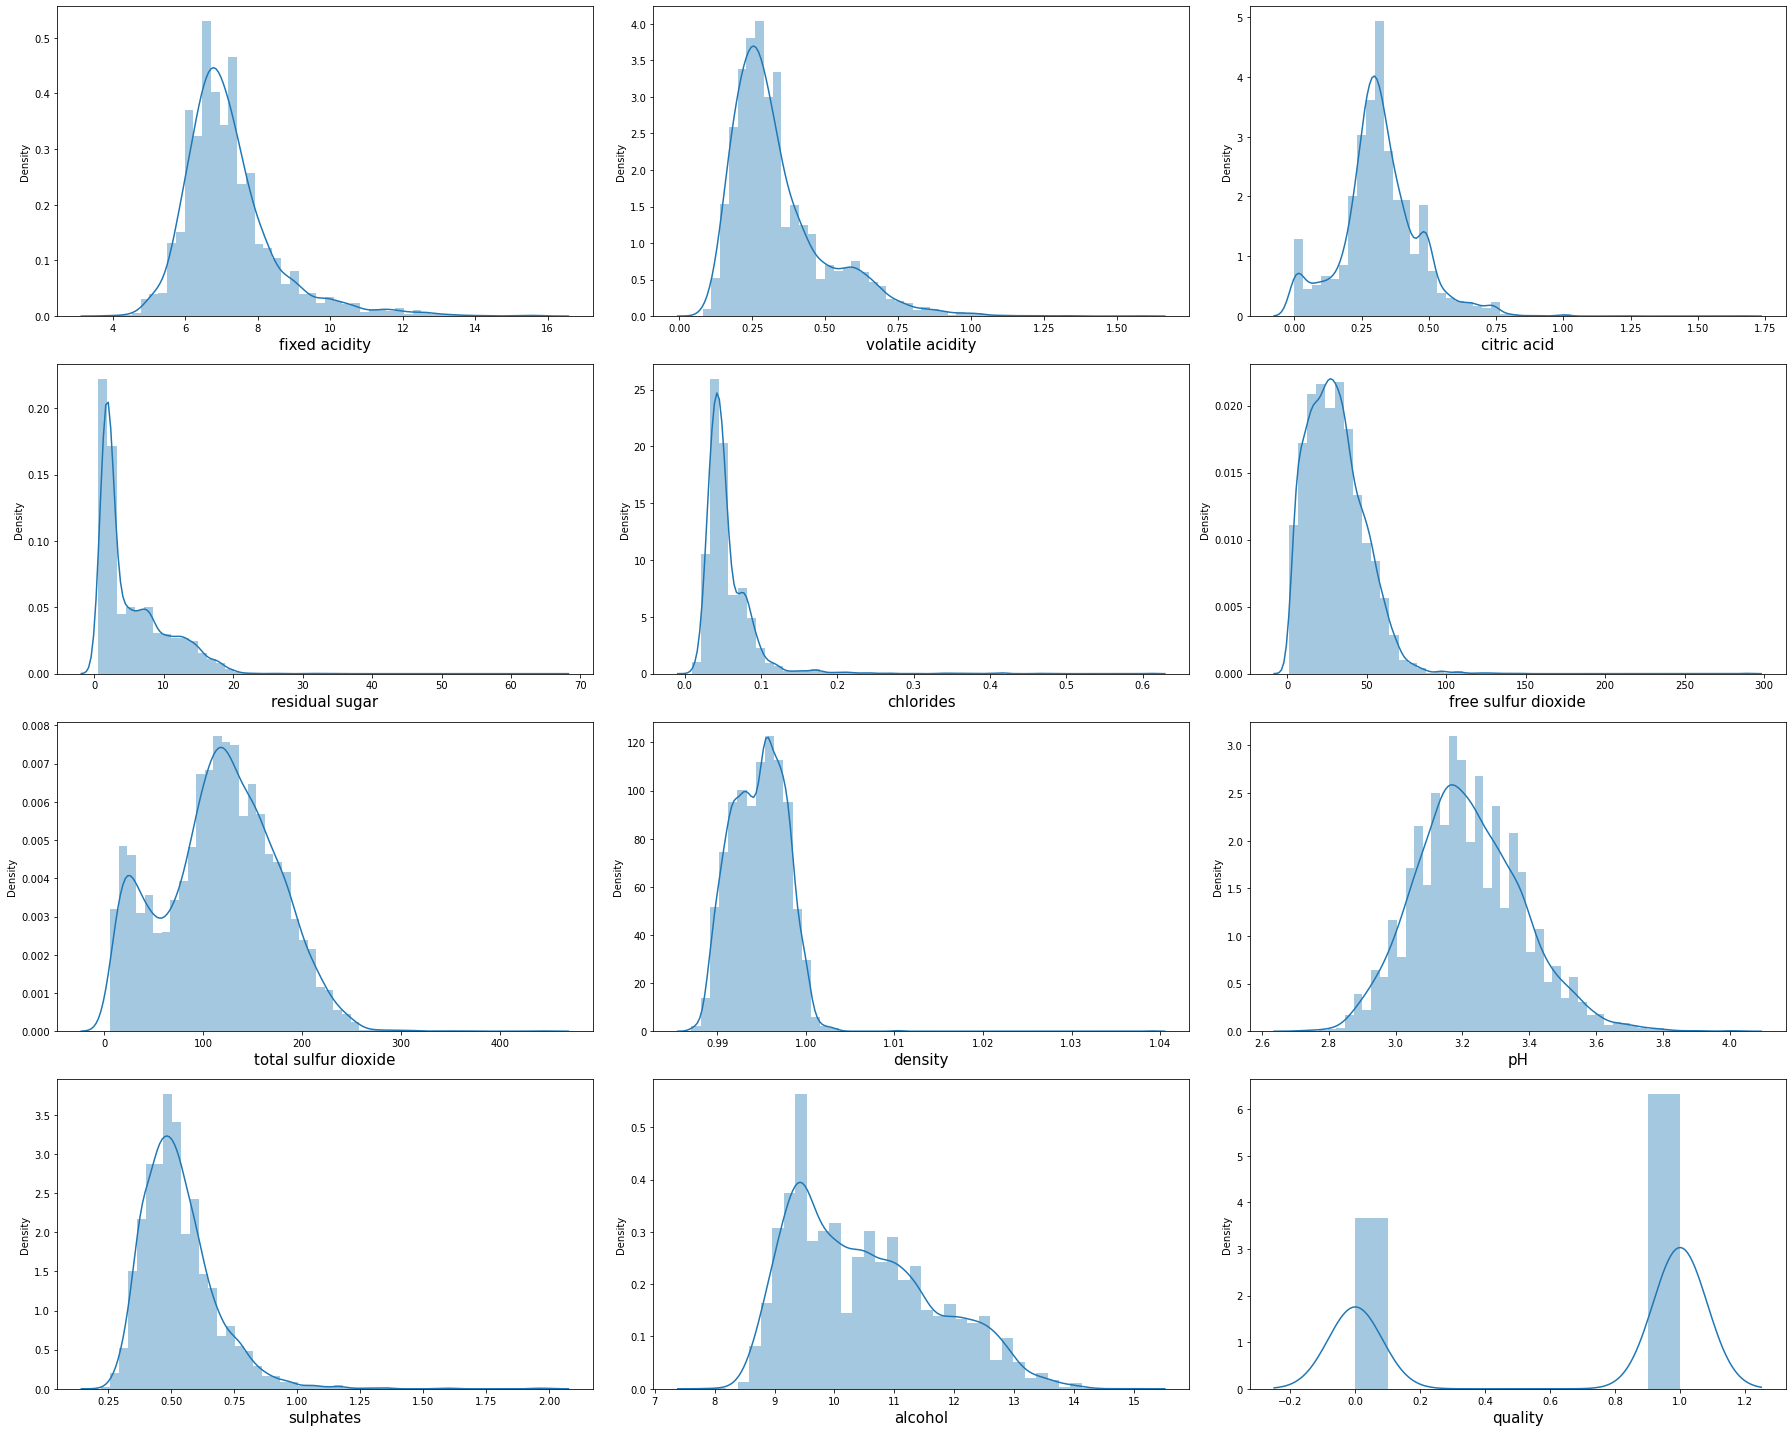

In [141]:
# let's see how data is distributed for every column

plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df:
    if plotnumber <= 12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [12]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### **Inferences from the dataset**:

   * The average of **'quality'** is 5.81 
   * **pH** has a high mean of 3.21, max is 4.01
   * **alcohol** has also high mean 10.49

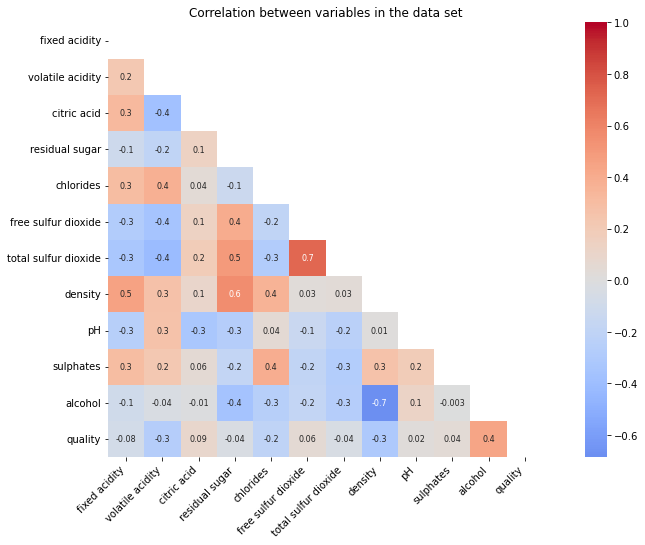

In [14]:
matrix = np.triu(df.corr())
plt.figure(figsize = (15,8))
plt.title('Correlation between variables in the data set')

corr = df.corr()
ax = sns.heatmap(corr, center=0, annot = True, fmt='.1g', mask=matrix, vmin=corr.values.min(), vmax=1,
                 cmap= 'coolwarm', square=True, annot_kws={"size":8})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

### **Inferences from the heatmap**:
   * High degree of positive correlation between **alcohol** and **quality**. Wines with high alcohol content are perceived as better quality
   * Negative correlation between **quality** and **density**. With increase in density perceived quality of wine decreases
   * In addition, **volatile acidity** i.e. fizziness in wines tend to have a negative impact. People do notlike wine that are fizzy. Also, volatile acidity could be an indicative that the wine is spoilt or has unpleasant aromas.

In [ ]:
# Find the column with high correlation
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) > 0.7:
            name = df.corr().columns[a]
            print(name)

## Some technique used with the unmodified database

   * Chemical Composition of Wine Dataset → Linear Regression → Any Model to Predict & Solve for Quality (Artificial Neural Network, Support Vector Machine, Random Forest, Decision Tree Classifier, etc)


### Linear Regression

   * Linear Regression can be expressed as: Y = β0 + β1X1 + β2X2 + ∙ ∙ ∙ + βk Xn + ϵ
   * Where: 
        + Y = Dependent Variable
        + X1, X2 … = Independent Variables or Predictors β0, β1… = Regression Coefficients
        + ϵ = Error Term
        
   * Model → Predict & Solve
       · Artificial Neural Network: Also known as ANN is a computing system designed to simulate the way as to how a human brain analyses information. It consists of inputs, outputs and a hidden layer where the computing takes place. 
       * Considering our case, as we are going to do classification tasks i.e. quality of wine from compositions, we will use Feedforward Neural Network (FFN). In such kind of networks, information moves in only one direction. A schematic representation of


In [55]:
df = pd.read_csv("wine.csv", index_col = "index")

In [48]:
X = df.iloc[:, 0:11].values
y = df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates','alcohol'] , 
                        columns=['Coefficient'])
print(coeff_df)

print('The intercept:',regressor.intercept_)


                      Coefficient
fixed_acidity            0.070359
volatile_acidity        -1.276869
citric_acid             -0.074988
residual_sugar           0.045344
chlorides               -0.816479
free_sulfur_dioxide      0.005386
total_sulfur_dioxide    -0.002485
density                -57.570877
pH                       0.462708
sulphates                0.757100
alcohol                  0.262909
The intercept: 58.308962022680056


* Features have **negative** impact on Wine Quality are: 'volatile_acidity', 'citric_acid', 'chlorides', 'total_sulfur_dioxide', 'density'

* Features have **positive** impact on Wine Quality are: 'fixed_acidity', 'residual_sugar','free_sulfur_dioxide', 'pH', 'sulphates', 'alcohol'

In [49]:
print("Train Accuracy:", regressor.score(X_train, y_train))

Train Accuracy: 0.2937579730768375


In [50]:
print("Test Accuracy:",regressor.score(X_test, y_test))

Test Accuracy: 0.2874326217383436


In [51]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(df.sulphates, df.quality)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.038


### Decision Tree Classification

In [146]:
df = pd.read_csv("wine.csv", index_col = "index")
print(df.columns)
y = df.quality
X = df.iloc[:, 0:11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)

#Scale the dataset as the values of variables are continuous:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


DecisionTreeClassifier()

In [147]:
# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {dtc_acc}\n")


Accuracy Score of Training Data is 1.0
Accuracy Score of Testing Data is 0.54



In [144]:
#Let's see how our model performed
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         9
           4       0.25      0.23      0.24        65
           5       0.59      0.59      0.59       642
           6       0.59      0.57      0.58       851
           7       0.47      0.52      0.49       324
           8       0.38      0.40      0.39        58
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1950
   macro avg       0.33      0.33      0.33      1950
weighted avg       0.55      0.55      0.55      1950



Accurate score: 


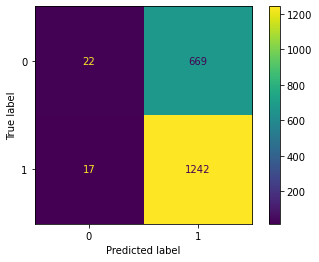

In [138]:
#Running SVC algorithm

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)

clf = SVC(random_state=42)
clf.fit(X_train, y_train)
SVC(random_state=42)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot() 
print('Accurate score: ')

In [ ]:
interested_features = df[[
    "fixed acidity",
    "volatile acidity",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    #"total sulfur dioxide",
    "density",
    "sulphates"
]]
df_interested  = interested_features.copy()
df_interested

## Feature engineering

In [121]:
df = pd.read_csv("wine.csv", index_col = "index")

X = df.iloc[:, 0:11]
X.shape

(6497, 11)

In [122]:
# Transform the target to Binary
df['quality'] = df['quality'].apply(lambda x: 0 if x < 6 else 1)
y = df.iloc[:, 11]

In [123]:
y.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

In [ ]:
# Preprocess The X Data By Scaling whole set of Feature dataset
#from sklearn.preprocessing import StandardScaler 
#scaler = StandardScaler().fit(features)
#features = scaler.transform(features)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0, stratify = y)

In [125]:
X_train.shape

(4547, 11)

In [126]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Building a neural net basic model

In [139]:
model = Sequential()
model.add(Dense(20, input_dim=11, activation='relu', kernel_initializer ='normal'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Compile the model

In [128]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

### Fit the keras model on the dataset

In [129]:
history = model.fit(X_train, y_train, epochs= 50, batch_size=32, validation_split = 0.1, verbose = 1)

Epoch 1/50
128/128 [==============================] - 1s 2ms/step - loss: 0.6063 - accuracy: 0.6310 - val_loss: 0.5418 - val_accuracy: 0.7011
Epoch 2/50
128/128 [==============================] - 0s 1ms/step - loss: 0.5352 - accuracy: 0.7270 - val_loss: 0.4882 - val_accuracy: 0.7802
Epoch 3/50
128/128 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.7507 - val_loss: 0.4676 - val_accuracy: 0.7912
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7549 - val_loss: 0.4697 - val_accuracy: 0.7912
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7576 - val_loss: 0.4733 - val_accuracy: 0.8088
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7593 - val_loss: 0.4643 - val_accuracy: 0.8044
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.4869 - accuracy: 0.7608 - val_loss: 0.4620 - val_accuracy: 0.8044
Epoch 

In [133]:
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_155 (Dense)            (None, 20)                240       
_________________________________________________________________
dense_156 (Dense)            (None, 8)                 168       
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 9         
_________________________________________________________________
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________


### Evaluate the NN model

In [130]:
# evaluate the test set
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

61/61 [==============================] - 0s 1ms/step - loss: 0.4942 - accuracy: 0.7610

loss: 49.42%

accuracy: 76.10%


In [131]:
# evaluate the training set
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

143/143 [==============================] - 0s 884us/step - loss: 0.4418 - accuracy: 0.7983

loss: 44.18%

accuracy: 79.83%


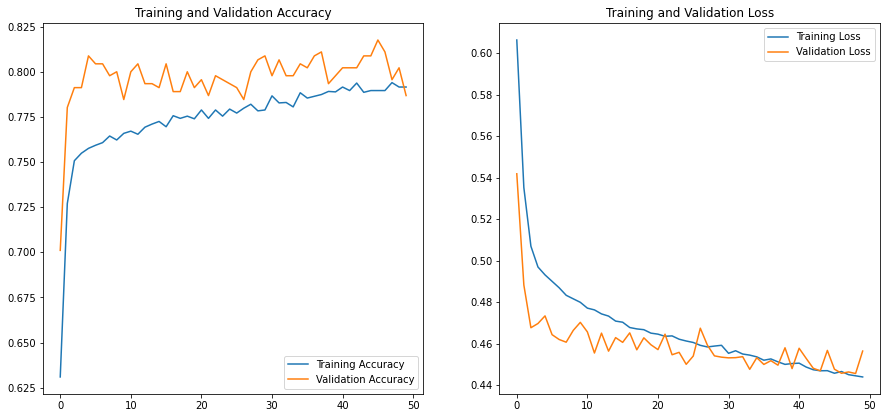

In [132]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [114]:
# make probability predictions with the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

### Make predictions

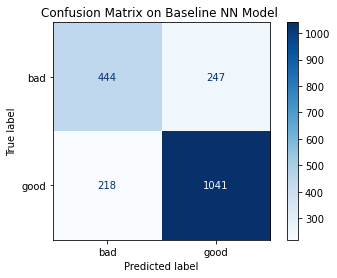

In [140]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

labels = ["bad", "good"]
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix on Baseline NN Model ')
plt.show()

In [183]:
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("wine.csv", index_col = "index")
X = df.iloc[:, 0:11]
df['quality'] = df['quality'].apply(lambda x: 0 if x < 6 else 1)
y = df.iloc[:, 11]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.30)
# creating normalization object 
norm = StandardScaler()
# fit data
norm_fit = norm.fit(X_train)
X_train = norm_fit.transform(X_train)
X_test = norm_fit.transform(X_test)

(6497, 11)
(6497,)


## Tuning Models

### Tuning on Activation functions

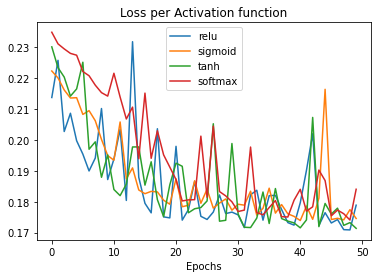

In [164]:
def get_model(act_function) :
    # return a model with a new activation function
    model = Sequential()
    # input layer 
    model.add(Dense(20, activation='relu', input_shape=(11,), kernel_initializer ='normal'))
    # hidden layer 
    model.add(Dense(8, activation=act_function))
    # output layer 
    model.add(Dense(1, activation='sigmoid'))
    return model

# Tuning on Activation functions: ['relu', 'sigmoid', 'tanh']
activations = ['relu', 'sigmoid', 'tanh', 'softmax']#, 'softplus', 'softsign', 'linear']

# Loop over the activation functions
activation_results = {}

for act in activations:
    # Get a new model with the current activation
    model = get_model(act)
    #compile
    model.compile(optimizer=Adam(learning_rate = 0.001),loss='mse',
                  metrics=['accuracy'])
    # Fit the model and store the history results
    history = model.fit(X_train,y_train, epochs=50,validation_data=(X_test, y_test), verbose=0)
    activation_results[act] = history
        
#Extract val_loss history of each activation function
val_loss_per_funct = {k:v.history['val_loss'] for k,v in activation_results.items()}

# Create a dataframe from val_loss_per_function
val_loss_curves = pd.DataFrame(val_loss_per_funct)

# Call plot on the dataframe
val_loss_curves.plot(title='Loss per Activation function')
plt.xlabel('Epochs')
plt.show()   

Title =  Accuracy and loss plot Activation function: 'tanh'
Train: 0.734, Test: 0.706


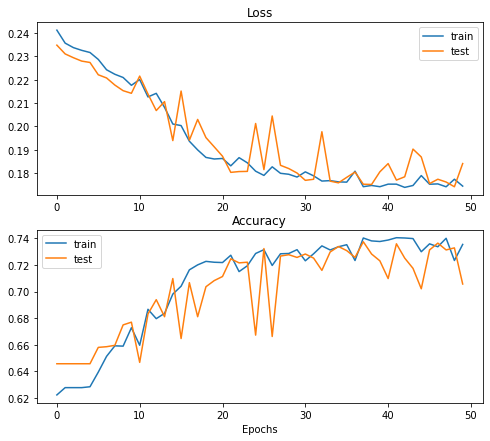

In [175]:
from matplotlib import pyplot
def plot_loss_accuracy (history):
    # plot loss during training
    plt.figure(figsize=(8,7))
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.xlabel('Epochs')
    pyplot.legend()
    pyplot.show()
    return
def evaluate_model(title, model, history, X_train, y_train, X_test, y_test):
    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Title = ', title)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss_accuracy during training
    plot_loss_accuracy(history)
    return
title = "Accuracy and loss plot Activation function: 'tanh'"
evaluate_model(title, model, history, X_train, y_train, X_test, y_test)

### Tuning on Optimizer functions

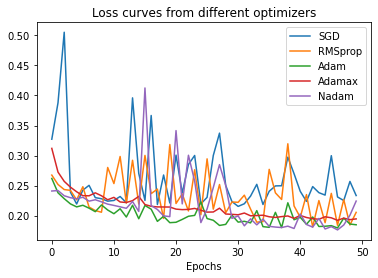

In [177]:
def get_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=11, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

optimizers = ['SGD', 'RMSprop', 'Adam', 'Adamax', 'Nadam']

optimizer_results = {}

for opt in optimizers:
    model = get_model(opt)
    model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train,y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
    optimizer_results[opt] = history
        
#Extract val_loss history of each activation function
val_loss_per_funct = {k:v.history['val_loss'] for k,v in optimizer_results.items()}

# Create a dataframe from val_loss_per_function
val_loss_curves = pd.DataFrame(val_loss_per_funct)

# Call plot on the dataframe
val_loss_curves.plot(title='Loss curves from different optimizers')
plt.xlabel('Epochs')
plt.show()   

Title =  Accuracy and loss plot Activation function: 'tanh'
Train: 0.678, Test: 0.662


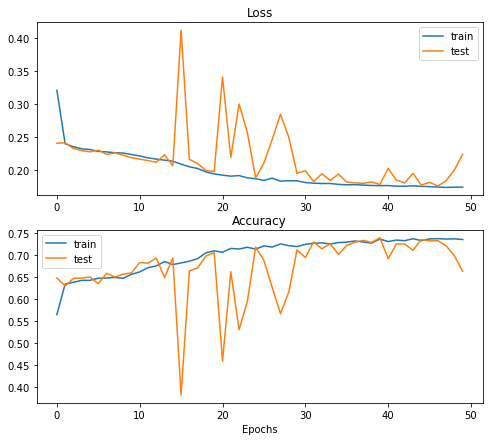

In [178]:
from matplotlib import pyplot
def plot_loss_accuracy (history):
    # plot loss during training
    plt.figure(figsize=(8,7))
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    # plot accuracy during training
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['accuracy'], label='train')
    pyplot.plot(history.history['val_accuracy'], label='test')
    pyplot.xlabel('Epochs')
    pyplot.legend()
    pyplot.show()
    return
def evaluate_model(title, model, history, X_train, y_train, X_test, y_test):
    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Title = ', title)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
    # plot loss_accuracy during training
    plot_loss_accuracy(history)
    return
title = "Accuracy and loss plot Activation function: 'tanh'"
evaluate_model(title, model, history, X_train, y_train, X_test, y_test)

### GRID SEARCH for best hyperparameters will be in the next notebook ...

## Comparison of estimators between the best hyperparameter neural net model and non NN models

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def hyper_model():
    model = Sequential()
    model.add(Dense(30, input_dim=11, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='mse', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])
    #model.compile(loss='binarycrossentropy', optimizer=Adam(learning_rate = 0.001), metrics=['accuracy'])

    return model

models = []
estimator = KerasClassifier(build_fn= hyper_model, nb_epoch=50, verbose=1)

models.append(('Neural Network: ', estimator))
models.append(('KNN', KNeighborsClassifier(3)))
models.append(('SVC', SVC(gamma=2, C=1)))
models.append(('DecisionTree', DecisionTreeClassifier(max_depth=5)))
models.append(('RandomForest', RandomForestClassifier(max_depth=5)))

for name, model in models:
    results = cross_val_score(model, X_train, y_train, cv=10)
    print("{}: {}".format(name, results.mean()))

/Users/minhhienvo/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/scikeras/wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
/Users/minhhienvo/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/minhhienvo/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/minhhienvo/opt/miniconda3/envs/tensorflow/lib/python3.8/site-packages/scikeras/wrappers.py", line 1465, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Users/minhhienvo/opt/miniconda3/envs/tensorflow/li

Neural Network: : nan
KNN: 0.7528019557534977
SVC: 0.7576380887834632
DecisionTree: 0.7400517984218424
RandomForest: 0.7552229268528827
